In [97]:
import pandas as pd
import seaborn as sns
import numpy as np

# Let's first take a general look at the datset

In [98]:
df = pd.read_csv('HOUSE_PRICE_PREDICTION.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [100]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


<AxesSubplot:>

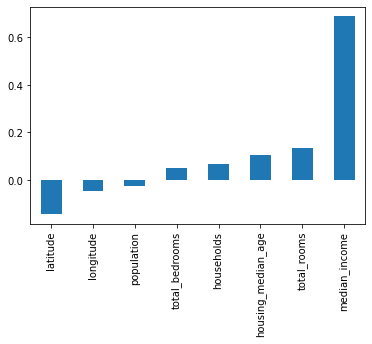

In [102]:
df.select_dtypes(include=np.number).corr()['median_house_value'][:-1].sort_values().plot(kind= 'bar') # the median house value is highly realted to the median income

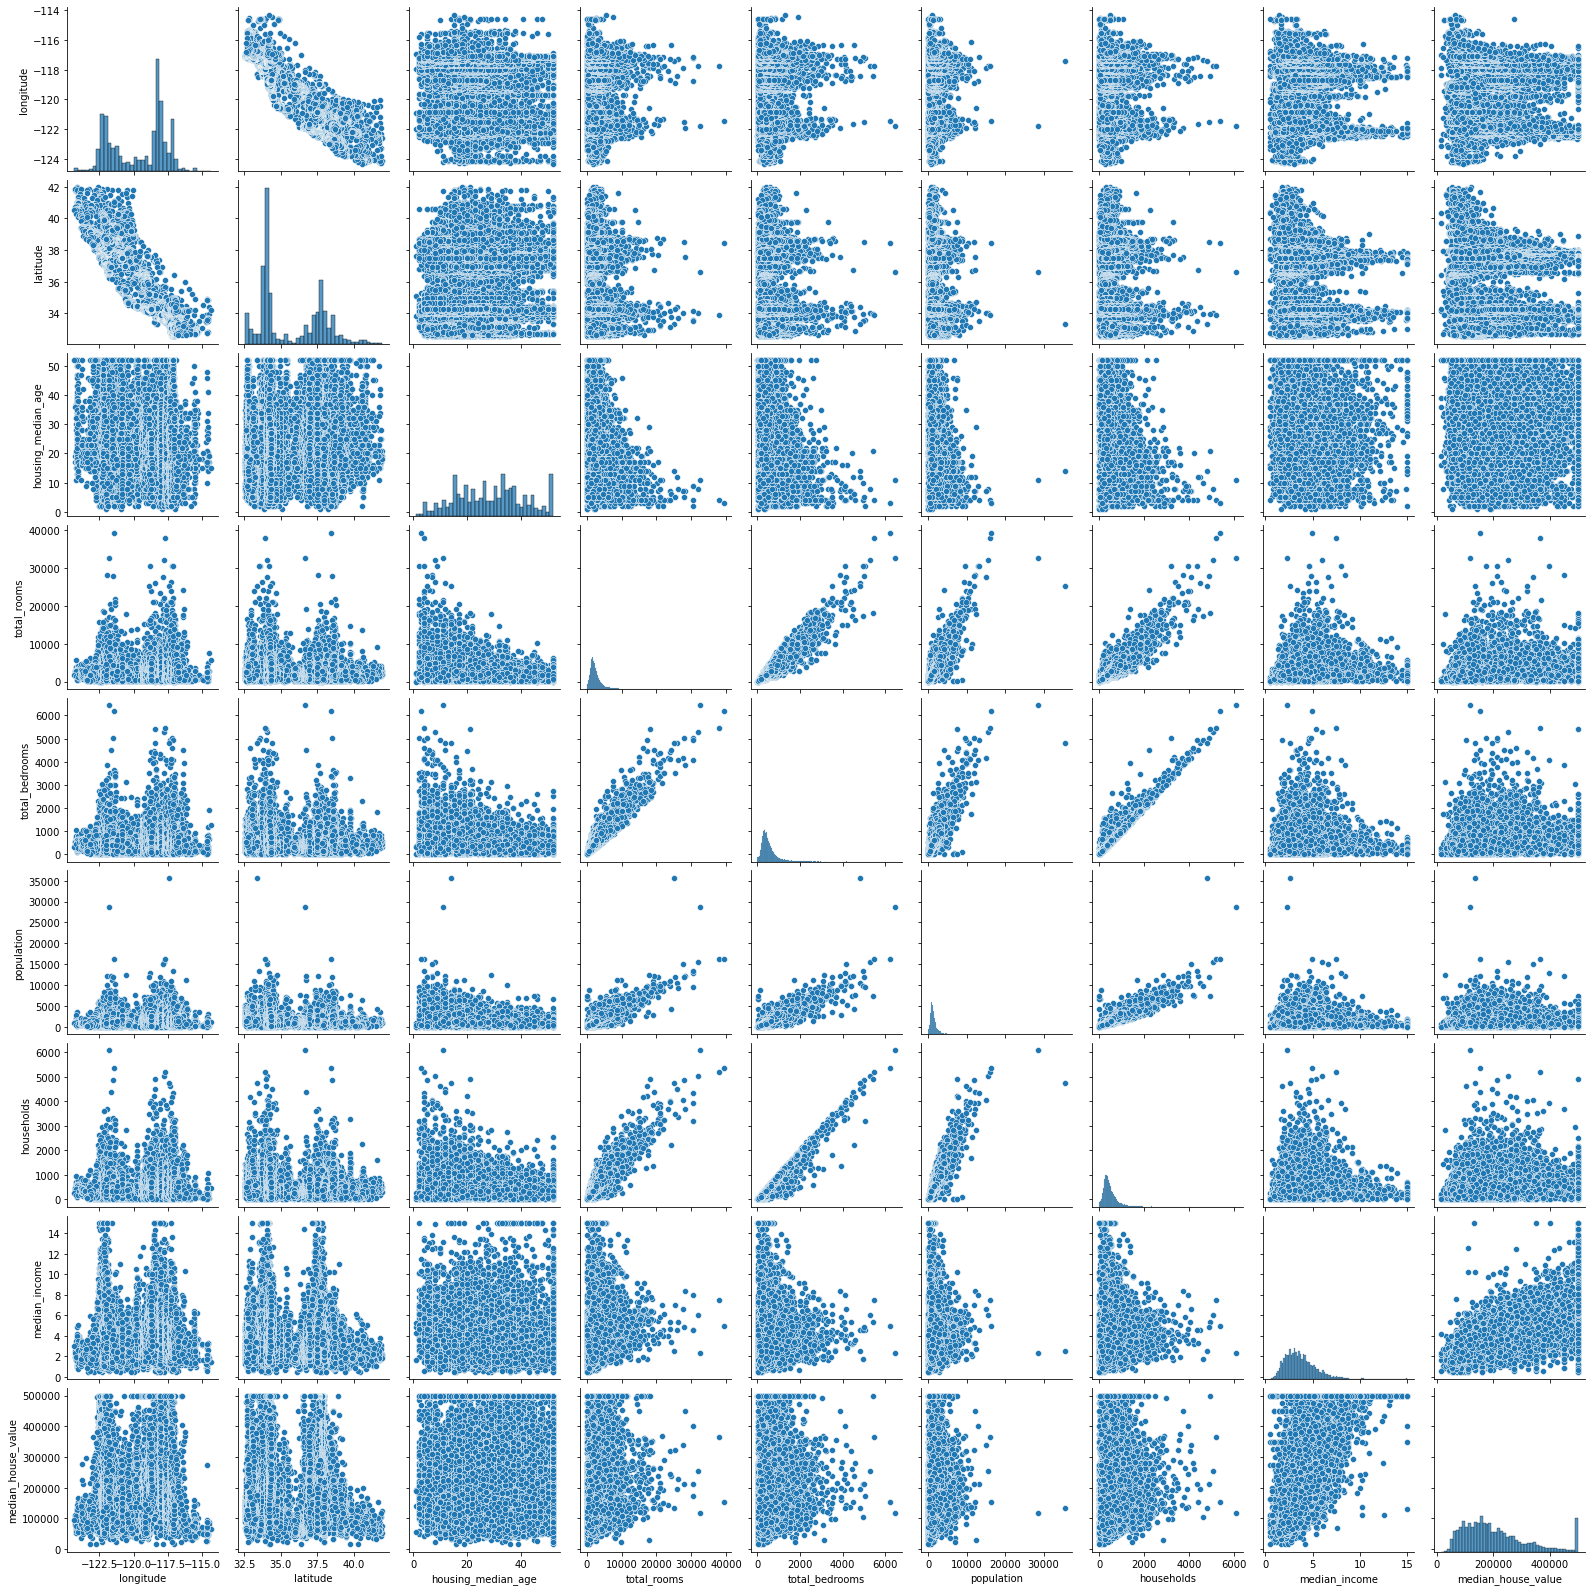

In [103]:
sns.pairplot(df);

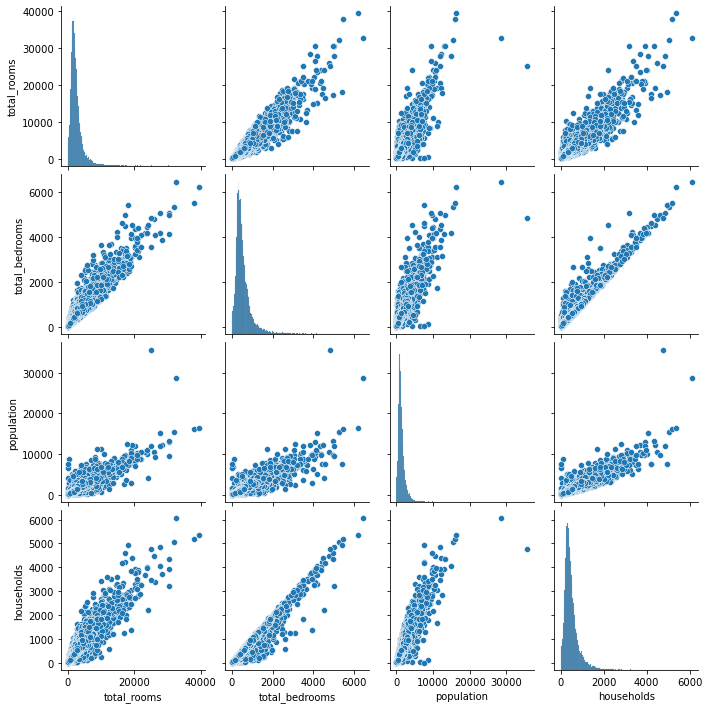

In [104]:
sns.pairplot(df, vars=['total_rooms', 'total_bedrooms', 'population', 'households']); # as we can see, this columns are very much correlated

In [105]:
df.select_dtypes(exclude=np.number).value_counts() # the only categorical column is ocean_proximity

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [106]:
df.isnull().sum() # notice that we have a coloum that contains missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

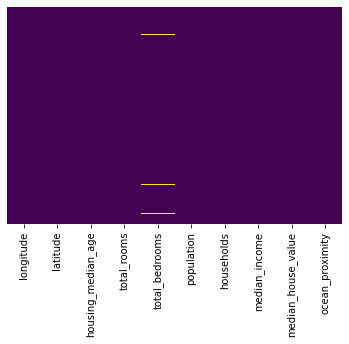

In [107]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=[]); # we can plot to see the missing data

# Plot the geographic data

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

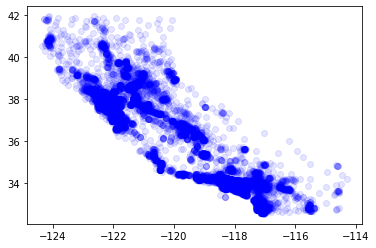

In [109]:
plt.plot(df['longitude'], df['latitude'],'ob',  alpha=0.1);

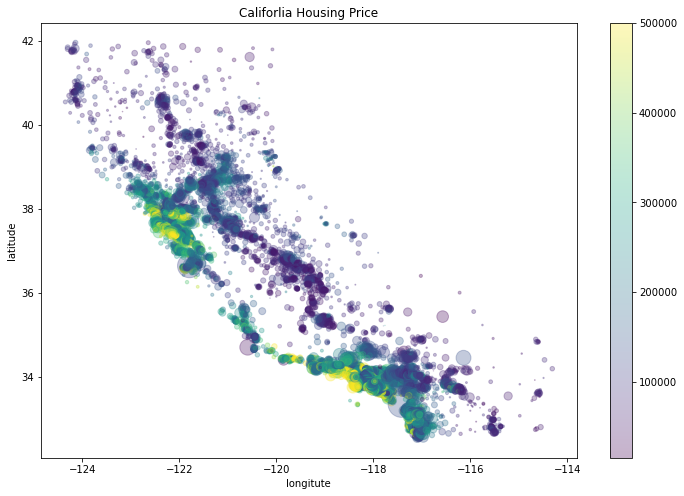

In [110]:
plt.scatter(df['longitude'], df['latitude'], alpha=0.3, c=df['median_house_value'], s=df['population']/50)
plt.xlabel('longitute')
plt.ylabel('latitude')
plt.title('Califorlia Housing Price')
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches(12,8)

# Experimenting with Attribute Combinations

In [111]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

<AxesSubplot:>

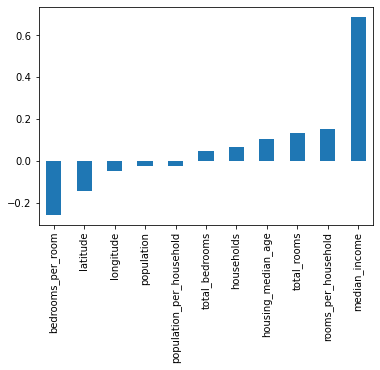

In [112]:
df.corr()['median_house_value'].sort_values()[:-1].plot(kind='bar') # bedrooms_per_room is more related to the median_house_value;

# Prepare the data for machine learning algorithm

In [113]:
X = df.drop(['median_house_value'], axis=1).copy()
y = df['median_house_value']

### fill the missing value in the dataset

In [114]:
X.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [115]:
median2 = X['bedrooms_per_room'].median()
X['bedrooms_per_room'].fillna(median2, inplace=True)

In [116]:
median = X['total_bedrooms'].median()
X['total_bedrooms'].fillna(median, inplace=True)

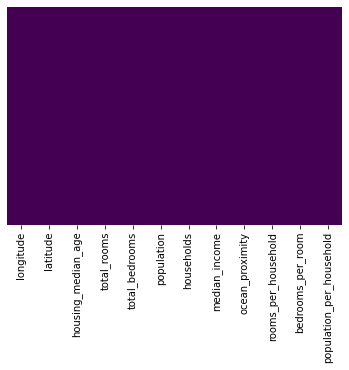

In [117]:
sns.heatmap(X.isnull(), cbar=False, cmap='viridis', yticklabels=False); # we can see right now, there is no missing data

### handling the categorical column

In [118]:
X.select_dtypes(exclude=np.number).iloc[:,0].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [119]:
X = pd.get_dummies(X)

In [120]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0,0,0,1,0


### Scale the dataset

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [122]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=101)

In [123]:
scaler = StandardScaler()

In [124]:
Xtrain.loc[:,'longitude':'population_per_household'] = scaler.fit_transform(Xtrain.iloc[:,:-5])
Xtest.loc[:,'longitude':'population_per_household'] = scaler.transform(Xtest.iloc[:,:-5]) # you can also use ColumnTransformer to spearately do the feature engineering

/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


# Select and train a model

## linear model

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
linear = LinearRegression()

In [127]:
linear.fit(Xtrain, ytrain)

LinearRegression()

In [128]:
predict = linear.predict(Xtest)

### model evaluation

In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
mse = mean_squared_error(ytest, predict)

In [131]:
rmse = mse**0.5

In [132]:
print(mse)

4930999272.449536


In [133]:
print(rmse)

70221.07427581506


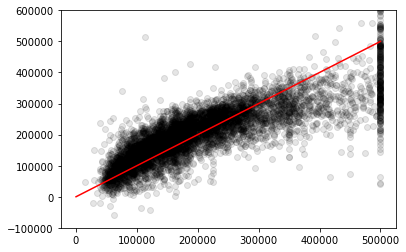

In [134]:
plt.plot(ytest, predict, 'ok', alpha=0.1)
plt.ylim(-100000,600000)
plt.plot([0,500000],[0,500000],'r')

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
scores = cross_val_score(linear,Xtrain,ytrain,cv=10, scoring='neg_mean_squared_error')

In [137]:
rmse = np.sqrt(-scores)

In [138]:
rmse.mean()

68101.33358168423

In [139]:
rmse.std()

3399.5192702364952

### random forest model and evaluation 

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rf = RandomForestRegressor()

In [142]:
rf.fit(Xtrain,ytrain)

RandomForestRegressor()

In [143]:
predict_rf = rf.predict(Xtest)

In [144]:
mse_rf = mean_squared_error(ytest, predict_rf)

In [145]:
rmse_rf =np.sqrt(mse_rf)

In [146]:
print(mse_rf)

2610953367.0764203


In [147]:
print(rmse_rf)

51097.48885294091


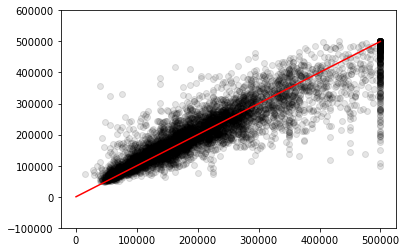

In [148]:
plt.plot(ytest, predict_rf, 'ok', alpha=0.1)
plt.ylim(-100000,600000)
plt.plot([0,500000],[0,500000],'r');

In [ ]:
scores_rf = cross_val_score(rf,Xtrain,ytrain,cv=10, scoring='neg_mean_squared_error')

In [93]:
rmse_rf = np.sqrt(-scores)

In [94]:
rmse_rf.mean()

68101.33358168423

In [95]:
rmse_rf.std() # this result is better than that from the linear model, let's see if we can further improve it

3399.5192702364952

### fine-tune the model 

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
params = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

In [66]:
grid = GridSearchCV(rf, params, cv=10,scoring='neg_mean_squared_error')

In [67]:
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [68]:
grid.best_params_

{'max_features': 6, 'n_estimators': 30}

In [69]:
grid.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [70]:
for mean_scores, params in zip(-grid.cv_results_['mean_test_score'], grid.cv_results_['params']):
    print(np.sqrt(mean_scores), params)

63212.56085032063 {'max_features': 2, 'n_estimators': 3}
54844.71087193498 {'max_features': 2, 'n_estimators': 10}
51682.95026186489 {'max_features': 2, 'n_estimators': 30}
59102.41195159398 {'max_features': 4, 'n_estimators': 3}
52058.69244991992 {'max_features': 4, 'n_estimators': 10}
49301.631898340565 {'max_features': 4, 'n_estimators': 30}
57887.241356219456 {'max_features': 6, 'n_estimators': 3}
50754.702371208674 {'max_features': 6, 'n_estimators': 10}
48833.970331381606 {'max_features': 6, 'n_estimators': 30}
57631.87535360528 {'max_features': 8, 'n_estimators': 3}
50419.83837798203 {'max_features': 8, 'n_estimators': 10}
48970.2421930329 {'max_features': 8, 'n_estimators': 30}
61234.62306062882 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52804.19180878878 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59499.84889234917 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51727.04660036911 {'bootstrap': False, 'max_features': 3, 'n_estimators':

### rebuild the forest model and evaluation

In [71]:
tuned_rf = grid.best_estimator_

In [72]:
tuned_rf.fit(Xtrain, ytrain)

RandomForestRegressor(max_features=6, n_estimators=30)

In [73]:
tuned_rf_predict = tuned_rf.predict(Xtest)

In [74]:
mse_tuned_rf = mean_squared_error(ytest, tuned_rf_predict)

In [75]:
rmse_tuned_rf = np.sqrt(mse_tuned_rf)

In [76]:
print(mse_tuned_rf)

2648457095.6109867


In [77]:
print(rmse_tuned_rf)

51463.162510780334


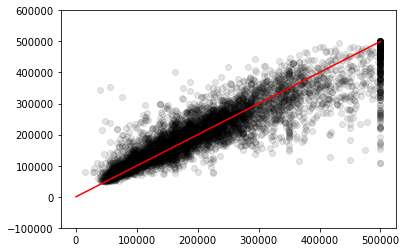

In [78]:
plt.plot(ytest, tuned_rf_predict, 'ok', alpha=0.1)
plt.ylim(-100000,600000)
plt.plot([0,500000],[0,500000],'r');

In [79]:
scores_tuned_rf = cross_val_score(tuned_rf,Xtrain,ytrain,cv=10, scoring='neg_mean_squared_error')

In [80]:
rmse_tuned_rf = np.sqrt(-scores_tuned_rf)

In [81]:
rmse_tuned_rf.mean() # this is slightly better than the former random forest model

49196.72086844877

In [82]:
rmse_tuned_rf.std() # we improved the model, oh yeah!!

1235.7393302547753